In [1]:
import sys
root_dir = "../"
sys.path.append(root_dir)

from test_bad_word import *
from utility import *

import time
import numpy as np
import pandas as pd
#pd.options.display.max_columns = None
#pd.options.display.mpl_style = 'default'

import re
import os
import sys
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import sparse

from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer('english')

In [2]:
bad_word_1  = [line.rstrip('\n') for line in open('../wordlist/google_bad_word.txt')]
#bad_word_2  = [line.rstrip('\n') for line in open('handcrafted_badword.txt')]
bad_word= set(bad_word_1  + test_bad_word) 
leave_set = bad_word | {'_url_','_email_','_hashtag_'}


def sentence_reconnect(text):
    reconnects= []
    phrases = re.split(r'[;:\.()\n!\?]', text)
    phrases = [re.findall(r'[\w%\*&#]+', ph) for ph in phrases]
    phrases = [ph for ph in phrases if ph]
    reconnect = [' '.join(phrase) for phrase in phrases]
    reconnects = reconnects + reconnect
    return reconnects 

def sentence_length(text):
    "compute the number of words in each sentences inside a comment; return a list"
    lst= []
    for i in text:
           lst.append(len(i.split()))
    return lst

def max_finder(data):
    "find the maximum number of sentences in a given dataset, data = df_xxx "
    maxlen = 0
    for i in data['Comment constructed'].values:
        current_len = len(i)
        if current_len > maxlen:
            maxlen = current_len
    return maxlen

def short_sentence_remover(text):
    if len(text) ==1:
        return text
    else:
        lst = []
        for i in text:
            if len(i.split())< 2 and i.lower() not in leave_set:
                pass
            else:
                lst.append(i)
        return lst

In [3]:
df_train = pd.read_csv('../data/train.csv', encoding="ISO-8859-1")
df_test = pd.read_csv('../data/test_with_solutions.csv', encoding="ISO-8859-1")
df_val = pd.read_csv('../data/impermium_verification_labels.csv', encoding="ISO-8859-1")

num_train = df_train.shape[0]
num_test = df_test.shape[0]
num_val = df_val.shape[0]

In [4]:
df_train['Comment']=df_train['Comment'].map(lambda x:parser(x))
df_train['Comment']=df_train['Comment'].map(lambda x:badword_replacer(x))
df_train['Comment_stemmed']=df_train['Comment'].map(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

df_test['Comment']=df_test['Comment'].map(lambda x:parser(x))
df_test['Comment']=df_test['Comment'].map(lambda x:badword_replacer(x))
df_test['Comment_stemmed']=df_test['Comment'].map(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

df_val['Comment']=df_val['Comment'].map(lambda x:parser(x))
df_val['Comment']=df_val['Comment'].map(lambda x:badword_replacer(x))
df_val['Comment_stemmed']=df_val['Comment'].map(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

In [5]:
df_train['Comment constructed'] = df_train['Comment'].map(lambda x: sentence_reconnect(x))
df_test['Comment constructed'] = df_test['Comment'].map(lambda x: sentence_reconnect(x))
df_val['Comment constructed'] = df_val['Comment'].map(lambda x: sentence_reconnect(x))

df_train['Comment constructed'] = df_train['Comment constructed'].map(lambda x: short_sentence_remover(x))
df_test['Comment constructed'] = df_test['Comment constructed'].map(lambda x: short_sentence_remover(x))
df_val['Comment constructed'] = df_val['Comment constructed'].map(lambda x: short_sentence_remover(x))

df_train['comment length'] = df_train['Comment constructed'].map(lambda x: len(x))
df_test['comment length'] = df_test['Comment constructed'].map(lambda x: len(x))
df_val['comment length'] = df_val['Comment constructed'].map(lambda x: len(x))

In [6]:
df_train['sentences length'] = df_train['Comment constructed'].map(lambda x: sentence_length(x))
df_test['sentences length'] = df_test['Comment constructed'].map(lambda x: sentence_length(x))
df_val['sentences length'] = df_val['Comment constructed'].map(lambda x: sentence_length(x))

df_train['max length'] = df_train['sentences length'].map(lambda x: max(x))
df_test['max length'] = df_test['sentences length'].map(lambda x: max(x))
df_val['max length'] = df_val['sentences length'].map(lambda x: max(x))

In [7]:
df_train

,Insult,Date,Comment,Comment_stemmed,Comment constructed,comment length,sentences length,max length
0,1,20120618192155Z,You fuck your dad .,you fuck your dad .,[You fuck your dad],1,[4],4
1,0,20120528192215Z,i really do not understand your point . It s...,i realli do not understand your point . it see...,"[i really do not understand your point, It see...",2,"[7, 9]",9
2,0,NaN,A majority of Canadians can and has been wron...,a major of canadian can and has been wrong bef...,[A majority of Canadians can and has been wron...,2,"[15, 54]",54
3,0,NaN,listen if you dont wanna get married to a man...,listen if you dont wanna get marri to a man or...,[listen if you dont wanna get married to a man...,3,"[16, 20, 22]",22
4,0,20120619094753Z,C c b n xu ng ng bi you t nh 2011 c n ho kh n...,c c b n xu ng ng bi you t nh 2011 c n ho kh ng...,[C c b n xu ng ng bi you t nh 2011 c n ho kh n...,6,"[17, 17, 19, 12, 29, 18]",29
5,0,20120620171226Z,"_hashtag_ OK , but I would hope they would s...","_hashtag_ ok , but i would hope they would sig...",[_hashtag_ OK but I would hope they would sign...,2,"[18, 32]",32
6,0,20120503012628Z,Yeah and where are you now ?,yeah and where are you now ?,[Yeah and where are you now],1,[6],6
7,1,NaN,shut the fuck up . you and the rest of your ...,shut the fuck up . you and the rest of your fa...,"[shut the fuck up, you and the rest of your fa...",2,"[4, 14]",14
8,1,20120502173553Z,Either you are fake or extremely stupid..mayb...,either you are fake or extrem stupid..mayb bot...,"[Either you are fake or extremely stupid, mayb...",2,"[7, 2]",7
9,1,20120620160512Z,That you are an idiot who understands neither...,that you are an idiot who understand neither t...,[That you are an idiot who understands neither...,1,[13],13


C:\Users\zcakz\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


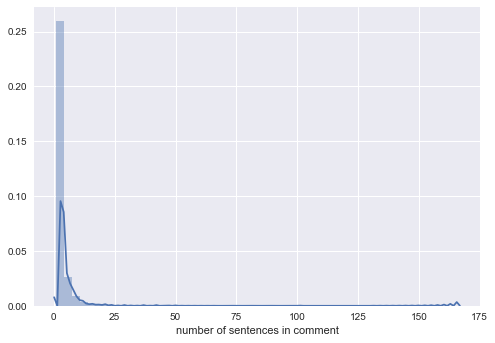

In [19]:
df_train['number of sentences in comment'] = df_train['comment length']
sns.distplot(df_train['number of sentences in comment'])
#sns.distplot(df_test['max length'])

C:\Users\zcakz\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


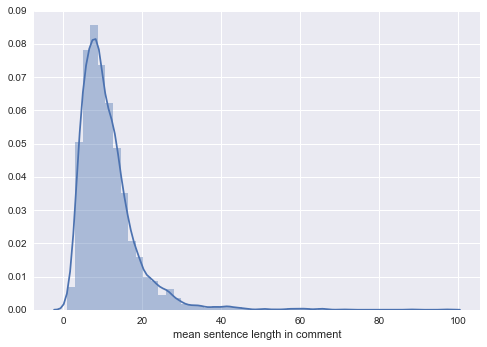

In [24]:
df_train['mean sentence length in comment'] = df_train['sentences length'].map(lambda x: np.mean(x))

sns.distplot(df_train['mean sentence length in comment'])

In [17]:
df_train.to_csv('data/RNN_train.csv')
df_test.to_csv('data/RNN_test.csv')
df_val.to_csv('data/RNN_val.csv')

In [18]:
def data_transform(file):
    data = []
    length = len(file)
    sentences = file['Comment constructed'].values
    insults = file['Insult'].values
    for i in range(length):
        current_sentences = sentences[i]
        current_insult = insults[i]
        instance = {"sentences": current_sentences, "insult": current_insult}
        data.append(instance)
    return data

In [19]:
train = data_transform(df_train)
test = data_transform(df_test)
val = data_transform(df_val)

In [20]:
train

[{'insult': 1, 'sentences': ['You fuck your dad']},
 {'insult': 0,
  'sentences': ['i really do not understand your point',
   'It seems that you are mixing apples and oranges']},
 {'insult': 0,
  'sentences': ['A majority of Canadians can and has been wrong before now and will be again',
   'Unless you are supportive of the idea that nothing is full proof or perfect so you take your chances and if we should inadvertently kill your son or daughter then them is the breaks and we can always regard you as collateral damage like in wartime and sorry but the cheques in the mail']},
 {'insult': 0,
  'sentences': ['listen if you dont wanna get married to a man or a women DONT DO IT',
   'what would it bother you if gay people got married stay in your lane do you let them do them',
   'And your god is so nice but quick to judg if your not like him thought you wasnt suppose to judge people']},
 {'insult': 0,
  'sentences': ['C c b n xu ng ng bi you t nh 2011 c n ho kh ng',
   'C c ng d n ng i c

* comment length: number of setences in a comment
* sentence length: number of words in a sentene

In [19]:
# to do: comment length and sentence length 

def pipeline(data, vocab = None, max_comment_len = 17, max_sentence_len_ = None):
    is_ext_vocab = True
    if vocab is None:
        is_ext_vocab = False
        vocab = {'<PAD>': 0, '<OOV>': 1}

    max_sentence_len = -1
    data_sentences = []
    for instance in data:
        sents = []
        for sentence_id, sentence in enumerate(instance['sentences']):
            if sentence_id <= max_comment_len:
                sent = []
                tokenized = sentence.split(' ')
                for token in tokenized:
                    if not is_ext_vocab and token not in vocab:
                        vocab[token] = len(vocab)
                    if token not in vocab:
                        token_id = vocab['<OOV>']
                    else:
                        token_id = vocab[token]
                    sent.append(token_id)
                if len(sent) > max_sentence_len:
                    max_sentence_len = len(sent)
                sents.append(sent)
        data_sentences.append(sents)
    
    if max_sentence_len_ is not None:
        max_sentence_len = max_sentence_len_
    out_sentences = np.full([len(data_sentences), max_comment_len, max_sentence_len], vocab['<PAD>'], dtype=np.int32)

    for i, elem in enumerate(data_sentences):
        for j, sent in enumerate(elem):
            if j < max_comment_len:
                if len(sent) <= max_sentence_len:
                    out_sentences[i, j, 0:len(sent)] = sent
                else:
                    out_sentences[i, j, 0: max_sentence_len] = sent[:max_sentence_len]

    return out_sentences,vocab

In [20]:
indexed_sentences, vocab = pipeline(train,max_comment_len = 16, max_sentence_len_ = 50)

In [21]:
indexed_sentences.shape

(3899, 16, 50)

In [22]:
indexed_sentences[2500]

array([[ 2691,    83,    39,  2703, 12044,   147,  5963,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0],
       [ 1464,   141,   222,    27,  4613,    28,    36,  2625,   146,
        12045,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0],
       [ 1464,    83,  4539,    83,   211, 12046,   139,   356,   585,
           19,   141,    16,    28,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,    

In [23]:
pipeline(val, vocab, 17, 50)[0][23]

array([[ 4260,   135,     1,    75,   132,     1,     1,     1,     1,
            1,     1,  3236,     1,  4184,  9692,  4184,  3246,     1,
          743,     1, 14479,     1,     1,   132,     1,     1,     1,
           75,  8530,     1,     1,     1,     1,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0],
       [    1,  4184,     1,    55,   614,   135,  3236,     1,   135,
            1,   135,     1,     1,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0],
       [    1,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,    